## Лабораторная работа 2.4.1
# Определение теплоты испарения жидкости

### Исследуемая жидкость: этиловый спирт


### Цель работы:
* определение давления насыщенного пара жидкости при различной температуре
* вычисление по полученным данным теплоты испарения с помощи уравнения Клапейрона-Клаузиуса. 

### В работе используются:
* термостат
* герметический сосуд, заполненный исследуемой жидкостью
* отсчетный микроскоп.

## 1. Теория

В этой работе мы будем определять теплоту испарения на методе, основанном на формуле Клайперона-Клаузиуса:

$$ {{dP}\over{dT}} = {{L}\over{T(V_2 - V_1)}}$$

Где $P$ - давление насыщенного газа при температуре $T$, $L$ - теплота испарения жидкости, $V_2$ - объём пара, а $V_1$ - объём жидкости.

Но в нашей работе есть один важный нюанс, который существенно упрощает расчёты: измерения производятся при давлениях ниже атмосферного.

В таблице ниже для ряда жидкостей приведены: температура, при которой давление насыщенных паров равно атмосферному, величины $V_2$ и $V_1$, входящие в формулу Клайперона-Клаузиуса, а также константы $а$ и $b$ - константы уравнения Ван-дер-Ваальса.

![Таблица_Теория](images/vv_table)

Из таблицы легко заметить, что $V_1$ не превосходит $0.05 * V_2$. Учитывая невысокую точность наших опытов, $V_1$ можно пренебречь.

В дальнейшем будем обозначать $V_2$ как $V$.

Запишем теперь уравнение Ван-дер-Ваальса, в котором $V$ связано с давлением и температурой:

$$ {(P + {{a}\over{V^2}})(V - b)} = {RT} $$

Если ещё раз взглянуть на таблицу, можно увидеть, что $b$ одного порядка с $V_1$. Значит, в уравнении Ван-дер-Ваальса можно пренебречь и $b$. Пренебрежение ${a}\over{V^2}$ по сравнению с $V$ даёт ошибку меньше $3\%$, а при давлениях ниже атмосферного ошибка будет ещё меньше.

Положим поэтому, что

$$ {V} = {{RT}\over{P}} $$

Подставим это выражение в уравнение Клайперона-Клаузиуса, чтобы найти конечную формулу для вычисления теплоты испарения:

$$ {L} = {{RT^2}\over{P}} {{dP}\over{dT}} = -R{{d(ln(P))}\over{d(1/T)}} $$

## 2. Рабочая установка

![Установка](images/laboratory_scale_plant.png)

## 3. Процесс работы

1. Измерим разность уровней в ртутном U-образном манометре с помощью микроскопа и температуру по термометру.

2. Включим термостат. Плавно повысим температуру, при этом через каждый градус необходимо измерять давление и температуру. Проведем те же измерения для охлаждения жидкости.

4. Построим график зависимости $d(P)$ от $d(T)$ и вычислим по нему коэффициент Джоуля-Томпсона.

4. Построим график зависимости $d(ln(P))$ от $d(1 / T)$ и вычислим по нему коэффициент Джоуля-Томпсона.

5. Сравним точность полученных результатов при использовании каждого из предыдущих методов.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import log
from scipy.optimize import curve_fit
from statistics import mean
from scipy import optimize as sp_opt
from scipy import odr as sp_odr
from IPython.display import display
%matplotlib inline

In [2]:
data = pd.read_csv('data/data.csv')

data['1/T'] = data['T'] ** -1
data['lnP'] = log(data['P'])

R = 8.3144598
M = 0.046

display(data)

P    T       1/T       lnP
0    5839.5036  289  0.003460  8.672401
1    6079.4832  290  0.003448  8.712675
2    6372.7916  291  0.003436  8.759793
3    6666.1000  292  0.003425  8.804790
4    7066.0660  293  0.003413  8.863059
5    7386.0388  294  0.003401  8.907347
6    7732.6760  295  0.003390  8.953210
7    8185.9708  296  0.003378  9.010177
8    8532.6080  297  0.003367  9.051650
9    8932.5740  298  0.003356  9.097460
10   9545.8552  299  0.003344  9.163862
11   9865.8280  300  0.003333  9.196832
12  10265.7940  301  0.003322  9.236573
13  10799.0820  302  0.003311  9.287216
14  11199.0480  303  0.003300  9.323584
15  11332.3700  304  0.003289  9.335419
16  12478.9392  305  0.003279  9.431798
17  13385.5288  306  0.003268  9.501929
18  13865.4880  307  0.003257  9.537158
19  14612.0912  308  0.003247  9.589605
20  15731.9960  309  0.003236  9.663452
21  16398.6060  310  0.003226  9.704952
22  17171.8736  311  0.003215  9.751028
23  18078.4632  312  0.003205  9.802477
24  17585.1718  311  0.003215  9.774811
25  16278.6162  310  0.003226  9.697608
26  15185.3758  309  0.003236  9.628088
27  14518.7658  308  0.003247  9.583197
28  14038.8066  307  0.003257  9.549581
29  13345.5322  306  0.003268  9.498937
30  12652.2578  305  0.003279  9.445591
31  11399.0310  304  0.003289  9.341284
32  11132.3870  303  0.003300  9.317614
33  10652.4278  302  0.003311  9.273543
34  10385.7838  301  0.003322  9.248193
35   9639.1806  300  0.003333  9.173591
36   9425.8654  299  0.003344  9.151213
37   8945.9062  298  0.003356  9.098951
38   8465.9470  297  0.003367  9.043807
39   8172.6386  296  0.003378  9.008547
40   7879.3302  295  0.003390  8.971998
41   7399.3710  294  0.003401  8.909150
42   7132.7270  293  0.003413  8.872449
43   6786.0898  292  0.003425  8.822630
44   6466.1170  291  0.003436  8.774331
45   6092.8154  290  0.003448  8.714866
46   5879.5002  289  0.003460  8.679227
47   5532.8630  288  0.003472  8.618461

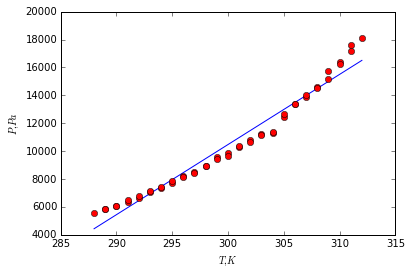

35948.2107382


In [3]:
odr_model = sp_odr.Model(lambda B, x: B[0] * x + B[1])
odr_data = sp_odr.RealData(x = data['T'], y = data['P'], sx = 0.01, sy = 100)
odr = sp_odr.ODR(odr_data, odr_model, beta0 = [0, 0], maxit = 1000000)
odr_output = odr.run()
k = odr_output.beta

x = np.linspace(min(data['T']), max(data['T']))
y = k[0] * x + k[1]

plt.plot(x, y)
plt.plot(data['T'], data['P'], 'ro')
plt.xlabel('$T, K$')
plt.ylabel('$P, Pa$')
plt.show()

L = ((R * (mean(data['T']) ** 2) * k[0]) / mean(data['P']))
print(L)

##  4. Результаты вычислений первым способом

Получаем $L_0 = (35948 \pm 2575)  кДж/кг$ при н.у.

Погрешность $\approx 7 \%$, табличное значение совпадает с измеренным в рамках погрешности.

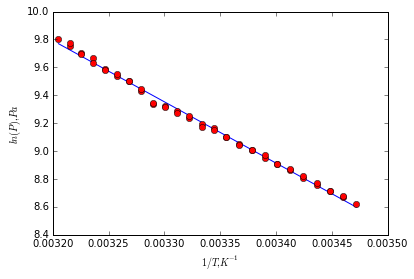

36507.1367055


In [4]:
odr_model = sp_odr.Model(lambda B, x: B[0] * x + B[1])
odr_data = sp_odr.RealData(x = data['1/T'], y = data['lnP'], sx = 1/0.01, sy = log(100))
odr = sp_odr.ODR(odr_data, odr_model, beta0 = [0, 0], maxit = 1000000)
odr_output = odr.run()
k = odr_output.beta

x = np.linspace(min(data['1/T']), max(data['1/T']))
y = k[0] * x + k[1]

plt.plot(x, y)
plt.plot(data['1/T'], data['lnP'], 'ro')
plt.xlabel('$1/T, K^{-1}$')
plt.ylabel('$ln(P), Pa$')
plt.show()

L = -R * k[0]
print(L)

# 5. Результаты вычислений вторым способом

Получаем $L_1 = (36507 \pm 1825) Дж/моль$.

Погрешность $\approx 5 \%$, табличное значение совпадает с измеренным в рамках погрешности.

# 6. Итог

Несмотря на то, что $L_1$ отличается от $L_{таб}$ на большее значение, оно измерено с меньшей относительной погрешностью. Стоит учесть, что $L_{таб}$ - это значение при н.у., а наши условия отличались от нормальных, значит, можно сказать, что скорее всего второе значение действительно ближе к истинному.

Этот результат очень просто объяснить: достаточно посмотреть на формулы, по которым мы вычисляли $L$ -- в первом случае погрешность и должна быть больше, чем во втором.